# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [2]:
env = UnityEnvironment(file_name="./VisualBanana/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States look like:


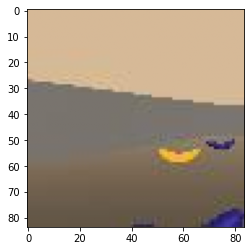

States have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


When finished, you can close the environment.

In [5]:
env.close()

ERROR:root:Exception calling application: 
Traceback (most recent call last):
  File "D:\Users\aup\Miniconda3\lib\multiprocessing\connection.py", line 312, in _recv_bytes
    nread, err = ov.GetOverlappedResult(True)
BrokenPipeError: [WinError 109] The pipe has been ended

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\aup\Miniconda3\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "D:\Users\aup\Miniconda3\lib\site-packages\unityagents\rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "D:\Users\aup\Miniconda3\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "D:\Users\aup\Miniconda3\lib\multiprocessing\connection.py", line 321, in _recv_bytes
    raise EOFError
EOFError


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
def process_inp(img):
    return img.transpose([0,3,1,2])

In [2]:
from collections import deque
import matplotlib.pyplot as plt
import random
import torch
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="./VisualBanana/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

init_frame = np.transpose(env_info.visual_observations[0], (0,3,1,2))[:,:,:,:] #cut the image partially
frame_size = init_frame.shape  # 1,3,84,84
        
nframes = 4
init_state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
print(init_state.shape)

(1, 3, 4, 84, 84)


cuda:0
torch.Size([1, 3, 4, 84, 84])
Convolution output size: 2304
---init----
torch.Size([1, 3, 4, 84, 84])
Convolution output size: 2304
---init----
Episode 100	Average Score: -0.01
Episode 200	Average Score: 1.33
Episode 300	Average Score: 3.29
Episode 400	Average Score: 6.16
Episode 500	Average Score: 8.06
Episode 600	Average Score: 10.76
Episode 700	Average Score: 11.82
Episode 800	Average Score: 11.74
Episode 900	Average Score: 11.64
Episode 1000	Average Score: 10.34
Episode 1100	Average Score: 11.34
Episode 1200	Average Score: 12.81
Episode 1240	Average Score: 13.02
Environment solved in 1140 episodes!	Average Score: 13.02


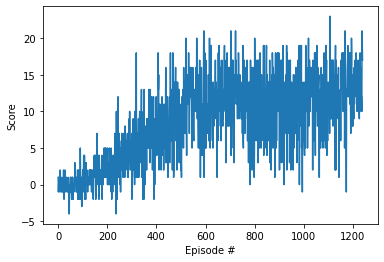

In [4]:
from dqn_agent_pix import Agent


def dqn(n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.0001, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    last_frame = last2_frame = last3_frame = None
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
   
        frame = np.transpose(env_info.visual_observations[0], (0,3,1,2))[:,:,:,:] #cut the image partially
        frame_size = frame.shape  # 1,3,84,84
        
        #print(frame_size)
        # NCDHW
        nframes = 4
        state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))
        #print(self.state.shape)
        state[0, :, 0, :, :] = frame
        if not(last_frame is None):
            state[0, :, 1, :, :] = last_frame
        if not(last2_frame is None):
            state[0, :, 2, :, :] = last2_frame
        if not (last3_frame is None):
            state[0, :, 3, :, :] = last3_frame
        last3_frame = last2_frame
        last2_frame = last_frame
        last_frame = frame
        #print('----',state.shape)
        score = 0
        for t in range(max_t):
            actiontemp = agent.act(state, eps)
            action = actiontemp.astype(int)
            env_info = env.step(action)[brain_name]                      # send the action to the environment
            frame = np.transpose(env_info.visual_observations[0], (0,3,1,2))[:,:,:,:] #cut the image partially
            next_state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))
            next_state[0, :, 0, :, :] = frame
            if not(last_frame is None):
                next_state[0, :, 1, :, :] = last_frame
            if not(last2_frame is None):
                next_state[0, :, 2, :, :] = last2_frame
            if not (last3_frame is None):
                next_state[0, :, 3, :, :] = last3_frame
            last3_frame = last2_frame
            last2_frame = last_frame
            last_frame = frame           
            #print('***',next_state.shape)
            reward = env_info.rewards[0]                                 # get the reward
            done = env_info.local_done[0]                                # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpointVisual.pth')
            break
    return scores
import random
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

agent = Agent(init_state.shape, action_size=4, seed=0)

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [1]:
#test the training code
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent_pix import Agent

import random
import torch

env = UnityEnvironment(file_name="./VisualBanana/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name]

init_frame = np.transpose(env_info.visual_observations[0], (0,3,1,2))[:,:,:,:] #cut the image partially
frame_size = init_frame.shape  # 1,3,84,84
        
nframes = 4
init_state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))
agent = Agent(init_state.shape, action_size=4, seed=0)

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpointVisual.pth'))
last_frame = last2_frame = last3_frame = None

frame = np.transpose(env_info.visual_observations[0], (0,3,1,2))[:,:,:,:] #cut the image partially
frame_size = frame.shape  # 1,3,84,84

nframes = 4
state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))
state[0, :, 0, :, :] = frame
if not(last_frame is None):
    state[0, :, 1, :, :] = last_frame
if not(last2_frame is None):
    state[0, :, 2, :, :] = last2_frame
if not (last3_frame is None):
    state[0, :, 3, :, :] = last3_frame
last3_frame = last2_frame
last2_frame = last_frame
last_frame = frame

score = 0                                          # initialize the score
while True:
    actiontemp = agent.act(state)
    action = actiontemp.astype(int)
    env_info = env.step(action)[brain_name]                      # send the action to the environment
    frame = np.transpose(env_info.visual_observations[0], (0,3,1,2))[:,:,:,:] #cut the image partially
    next_state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))
    next_state[0, :, 0, :, :] = frame
    if not(last_frame is None):
        next_state[0, :, 1, :, :] = last_frame
    if not(last2_frame is None):
        next_state[0, :, 2, :, :] = last2_frame
    if not (last3_frame is None):
        next_state[0, :, 3, :, :] = last3_frame
    last3_frame = last2_frame
    last2_frame = last_frame
    last_frame = frame           
    #print('***',next_state.shape)
    reward = env_info.rewards[0]                                 # get the reward
    done = env_info.local_done[0]                                # see if episode has finished
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += reward
    if done:
        break 
    
print("Score: {}".format(score))

            
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


torch.Size([1, 3, 4, 84, 84])
Convolution output size: 2304
---init----
torch.Size([1, 3, 4, 84, 84])
Convolution output size: 2304
---init----
Score: 8.0
